<br> 
​
<div class="alert alert-info"><b>PROJET 9 : REALISER UNE ETUDE DE MARCHE</b> 
​


<br> 

<div class="alert alert-warning"><b>CONTEXTE</b> 

'La poule qui chante', entreprise francaise d'agroalimentaire, souhaite se développer à l'international.

L'objectif de ce projet est de <b>réaliser une première analyse des groupements de pays que l’on peut cibler pour exporter les produits.<b>

A partir des données de la FAO, nous allons dans un premier temps réaliser une ACP afin de <b> comprendre les groupes, les liens entre les variables, les liens entre les individus...
    
Ensuite, nous allons tester <b>la classification ascendante hiérarchique, avec un dendrogramme comme visualisation.<b>

Et pour finir, nous utiliserons <b>la méthode des k-means<b>, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. 

<br> 

<div class="alert alert-warning"><b>PREMIERE PARTIE : <b>

    
    
> PREPARATION ET NETTOYAGE DES DONNEES

> ANALYSE EXPLORATOIRE DES DONNEES  

>REALISATION DE L'ACP


# IMPORTER LES LIBRAIRIES ET LES DONNEES 

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

import scipy.stats as stats
from scipy.stats import zscore 


import warnings
warnings.filterwarnings('ignore')

In [2]:
dispo = pd.read_csv(r'C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\DOSSIER PYTHON\P9\DisponibiliteAlimentaire_2017.csv')
population = pd.read_csv(r'C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\PROJETS OCR\PROJET 9\DAN-P9-data\Population_2000_2018.csv')
distance_france = pd.read_csv (r'C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\PROJETS OCR\PROJET 9\DAN-P9-data\df_distance_france.csv')

# EXPLORER, SELECTIONNER, MODIFIER LES DONNEES

## DF Disponibilité Alimentaire 

In [3]:
dispo.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
dispo.info()
# Pas de données manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [5]:
dispo.Élément.unique()
# Indicateurs à sélectionner pour réaliser l'étude

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [6]:
dispo.duplicated().sum()
# Pas de doublons

0

> Création d'un DF avec comme produit unique 'Viande de Volaille' 

In [7]:
df= dispo[dispo['Produit']== 'Viande de Volailles']
df.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées


> Sélectionner les colonnes

In [8]:
df = df[[ 'Zone','Élément', 'Unité', 'Valeur']]
df.head(2)

,Zone,Élément,Unité,Valeur
651,Afghanistan,Production,Milliers de tonnes,28.0
652,Afghanistan,Importations - Quantité,Milliers de tonnes,29.0


> Transformer les pays en individus (lignes) et les indicateurs en variables (colonnes).

In [9]:
df = pd.pivot_table(df, index = "Zone", columns="Élément", values = "Valeur").reset_index().rename_axis(None, axis=1)    
df.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


<br>
<div class="alert alert-success">
<b>NOTE</b> 

Nous sélectionnons les indicateurs pertinents à l'analyse de marché concernant la disponibilité du produit: 
 

'Disponibilité de protéines en quantité (g/personne/jour)'

'Disponibilité intérieure'

'Importations - Quantité'
    
'Exportations - Quantité'
    
'Production'
    
'Variation de stock'

</div>

In [10]:
df1 = df[['Zone','Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure', 'Importations - Quantité', 'Exportations - Quantité', 'Production', 'Variation de stock']]
df1.head()

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock
0,Afghanistan,0.54,57.0,29.0,NaN,28.0,0.0
1,Afrique du Sud,14.11,2118.0,514.0,63.0,1667.0,0.0
2,Albanie,6.26,47.0,38.0,0.0,13.0,4.0
3,Algérie,1.97,277.0,2.0,0.0,275.0,0.0
4,Allemagne,7.96,1739.0,842.0,646.0,1514.0,-29.0


<br>
<div class="alert alert-success">
<b>NOTE</b> 

Nous ajoutons des données démographiques (Facteur social - Cf Analyse PESTEL) via le fichier population.

</div>

## DF Population

In [11]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [12]:
#Sélection des colonnes
population = population [['Zone','Année','Valeur']]

In [13]:
population.replace(to_replace="Chine, continentale",
           value="Chine", inplace = True)
df1.replace(to_replace="Chine, continentale",
           value="Chine", inplace = True)

In [14]:
population = pd.pivot_table(population, index = "Zone", columns="Année", values = "Valeur").reset_index().rename_axis(None, axis=1)  
population.head()

,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921
1,Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518
2,Albanie,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,3002.678,2973.048,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740
3,Algérie,31042.235,31451.514,31855.109,32264.157,32692.163,33149.724,33641.002,34166.972,34730.608,35333.881,35977.455,36661.445,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408
4,Allemagne,81400.882,81453.885,81535.122,81614.380,81646.474,81602.741,81472.226,81277.830,81065.752,80899.961,80827.002,80855.632,80972.628,81174.367,81450.378,81787.411,82193.768,82658.409,83124.418


In [15]:
population.columns = ['Population_' + str(col) for col in population.columns]

In [16]:
population.rename(columns = {'Population_Zone' : 'Zone'}, inplace = True)
population.head(2)

,Zone,Population_2000,Population_2001,Population_2002,Population_2003,Population_2004,Population_2005,Population_2006,Population_2007,Population_2008,Population_2009,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018
0,Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921
1,Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518


> Nous sélectionnons uniquement la population de l'année 2017 (les informations de disponibilités alimentaires concernent également l'année 2017).

In [17]:
population_2017 = population[['Zone', 'Population_2017']]

## Jointure entre disponibilité alimentaire et population

In [18]:
# Test jointure
merge_outer = pd.merge(df1, population_2017, how = 'outer', on = 'Zone', indicator = True )
merge_outer._merge.value_counts()

both          172
right_only     66
left_only       0
Name: _merge, dtype: int64

In [19]:
merge_outer[merge_outer._merge=='right_only']

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,Population_2017,_merge
172,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,77.001,right_only
173,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,14.584,right_only
174,Antilles néerlandaises (ex),NaN,NaN,NaN,NaN,NaN,NaN,275.186,right_only
175,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,105.366,right_only
176,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,1494.076,right_only
...,...,...,...,...,...,...,...,...,...
233,Îles Marshall,NaN,NaN,NaN,NaN,NaN,NaN,58.058,right_only
234,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,NaN,NaN,37.115,right_only
235,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,NaN,104.751,right_only
236,Îles Vierges britanniques,NaN,NaN,NaN,NaN,NaN,NaN,29.577,right_only


> Il y a 66 pays pour lesquels nous n'avons aucune informations concernant les disponibilités almentaires du produit 'Viande de Volailles'. Nous ne gardons pas ces pays pour effectuer l'analyse. 

In [20]:
df_dispo_pop = pd.merge(df1, population_2017, how = 'left', on = 'Zone', indicator = True )
df_dispo_pop._merge.value_counts()

both          172
left_only       0
right_only      0
Name: _merge, dtype: int64

In [21]:
df_dispo_pop.drop('_merge', axis = 1, inplace = True )

<br>
<div class="alert alert-success">
<b>NOTE</b> 

Nous allons ajouter l'indicateur de la stabilité politique et le PIB par habitant de chaque pays pour l'année 2017 (Facteurs politiques - Cf Analyse PESTEL).

</div>

In [22]:
pib_hab = pd.read_csv(r'C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\PROJETS OCR\PROJET 9\DAN-P9-data\FAOSTAT_data_fr_9-27-2022 (3).csv')
stab_politique = pd.read_csv(r'C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\PROJETS OCR\PROJET 9\DAN-P9-data\FAOSTAT_data_fr_9-27-2022 (2).csv')

In [23]:
# Sélection des colonnes et modification nom colonne fichier PIB par habitant
pib_hab = pib_hab[['Zone', 'Valeur']]
pib_hab.rename(columns = {'Valeur' : 'PIB par habitant'}, inplace = True)

In [24]:
# Ajout données manquantes dans fichier PIB (source - Banque Mondiale)
df_Taiwan = {'Zone' : 'Chine, Taiwan Province de', 'PIB par habitant' : 22237}
df_Cuba = {'Zone' : 'Cuba', 'PIB par habitant' : 7561}
df_République_populaire_démocratique_de_Corée = {'Zone' : 'République populaire démocratique de Corée', 'PIB par habitant' : 1235}
df_Venezuela= {'Zone' : 'Venezuela (République bolivarienne du)', 'PIB par habitant' : 4341}
df_Yémen = {'Zone' : 'Yémen', 'PIB par habitant' : 843}
pib_hab = pib_hab.append(df_Taiwan, ignore_index = True)
pib_hab = pib_hab.append(df_Cuba, ignore_index = True)
pib_hab = pib_hab.append(df_République_populaire_démocratique_de_Corée, ignore_index = True)
pib_hab = pib_hab.append(df_Venezuela, ignore_index = True)
pib_hab = pib_hab.append(df_Yémen, ignore_index = True)

In [25]:
# Sélection des colonnes et modification nom colonne fichier Stabilité Politique
stab_politique = stab_politique[['Zone', 'Valeur']]
stab_politique.rename(columns = {'Valeur' : 'Indice de stabilité politique'}, inplace =True)

In [26]:
# Ajout donnée manquante dans fichier stabilité politique (source - FAO)
df_Chine = {'Zone': 'Chine', 'Indice de stabilité politique': (-0.23)}
stab_politique = stab_politique.append(df_Chine, ignore_index = True)

> Jointures

In [27]:
# Jointure entre les fichiers PIB par habitant et Stabilité politique

merge_pib_stab = pd.merge(pib_hab,stab_politique, how = 'outer', on = 'Zone', indicator = True )
merge_pib_stab._merge.value_counts()

both          192
right_only      6
left_only       0
Name: _merge, dtype: int64

In [28]:
merge_pib_stab.drop('_merge', axis = 1, inplace = True )

In [29]:
# Jointure entre disponibilité alimentaire/population et Pib/stabilité politique

merge_outer = pd.merge(df_dispo_pop, merge_pib_stab, how = 'outer', on ='Zone', indicator = True)
merge_outer._merge.value_counts()

both          170
right_only     28
left_only       2
Name: _merge, dtype: int64

In [30]:
merge_outer[merge_outer['_merge'] =='left_only' ]

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,Population_2017,PIB par habitant,Indice de stabilité politique,_merge
108,Nouvelle-Calédonie,14.05,11.0,9.0,NaN,1.0,-1.0,277.150,NaN,NaN,left_only
120,Polynésie française,16.20,15.0,15.0,0.0,1.0,0.0,276.102,NaN,NaN,left_only


> Il y a 2 pays pour lesquels nous n'avons pas de données concernant le PIB par habitant et l'indice de stabilité politique.

In [31]:
merge_outer[merge_outer['_merge'] =='right_only' ]

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,Population_2017,PIB par habitant,Indice de stabilité politique,_merge
172,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47709.8,-0.96,right_only
173,Bermudes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81835.0,1.00,right_only
174,Bhoutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11142.5,1.12,right_only
175,Brunéi Darussalam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60994.5,1.16,right_only
176,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773.6,-2.01,right_only
177,Comores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3032.3,0.04,right_only
178,Guinée équatoriale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22551.0,-0.17,right_only
179,Îles Marshall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3711.4,0.87,right_only
180,Libye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23468.0,-2.36,right_only
181,Micronésie (États fédérés de),NaN,NaN,NaN,NaN,NaN,NaN,NaN,3489.7,1.18,right_only


> Il y a 28 pays pour lesquels nous n'avons pas de données concernant les disponibilités alimentaires.

In [32]:
df_final =  pd.merge(df_dispo_pop, merge_pib_stab, how = 'inner', on ='Zone')
print(df_final.shape)
df_final.head()

(170, 10)


,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,Population_2017,PIB par habitant,Indice de stabilité politique
0,Afghanistan,0.54,57.0,29.0,NaN,28.0,0.0,36296.113,2058.4,-2.80
1,Afrique du Sud,14.11,2118.0,514.0,63.0,1667.0,0.0,57009.756,13860.3,-0.28
2,Albanie,6.26,47.0,38.0,0.0,13.0,4.0,2884.169,12771.0,0.38
3,Algérie,1.97,277.0,2.0,0.0,275.0,0.0,41389.189,11737.4,-0.92
4,Allemagne,7.96,1739.0,842.0,646.0,1514.0,-29.0,82658.409,53071.5,0.59


<br>
<div class="alert alert-success">
<b>NOTE</b> 

Nous ajoutons des données géographiques : les distances entre la France et les autres pays (Facteur géographique - Cf Analyse PESTEL).

</div>

## DF Distance

In [33]:
distance_france.head()

,Zone,Distance_France
0,Afghanistan,5594.223377
1,Afrique du Sud,9306.638530
2,Albanie,1603.944535
3,Algérie,1345.460397
4,Allemagne,880.634838


In [34]:
# Jointure entre les df distance_france et df_final

df_final_2 = pd.merge(df_final, distance_france, how = 'inner', on ='Zone')
print(df_final_2.shape)
df_final_2.head()

(182, 11)


,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,Population_2017,PIB par habitant,Indice de stabilité politique,Distance_France
0,Afghanistan,0.54,57.0,29.0,NaN,28.0,0.0,36296.113,2058.4,-2.80,5594.223377
1,Afrique du Sud,14.11,2118.0,514.0,63.0,1667.0,0.0,57009.756,13860.3,-0.28,9306.638530
2,Albanie,6.26,47.0,38.0,0.0,13.0,4.0,2884.169,12771.0,0.38,1603.944535
3,Algérie,1.97,277.0,2.0,0.0,275.0,0.0,41389.189,11737.4,-0.92,1345.460397
4,Allemagne,7.96,1739.0,842.0,646.0,1514.0,-29.0,82658.409,53071.5,0.59,880.634838


In [35]:
df_final_2.drop_duplicates(inplace = True)

In [36]:
print(df_final_2.shape)

(165, 11)


<br>
<div class="alert alert-warning">
<b>POUR RAPPEL</b> 
    
Pour réaliser l'étude marché et découvrir quels pays cibler afin d'exporter les produits de la 'Poule qui chante', nous avons choisis 10 indicateurs :
    
> deux indicateurs socio-économiques : le PIB/habitant pour l'année 2017 et la population de l'année 2017 
    
> un indicateur politique : l'indice de stabilité politique du pays pour l'année 2017
    
> six indicateurs sur la disponibilité alimentaire de la viande volaille dans chaque pays
    
> Un indicateur géographique : la distance entre la France et les autres pays 
</div>

# Traitement des NaNs

In [37]:
df_final_2.isnull().sum()

Zone                                                         0
Disponibilité de protéines en quantité (g/personne/jour)     0
Disponibilité intérieure                                     1
Importations - Quantité                                      1
Exportations - Quantité                                     35
Production                                                   3
Variation de stock                                           2
Population_2017                                              0
PIB par habitant                                             0
Indice de stabilité politique                                0
Distance_France                                              0
dtype: int64

In [38]:
df_final_2[df_final_2.isnull().any(axis=1)]

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,Population_2017,PIB par habitant,Indice de stabilité politique,Distance_France
0,Afghanistan,0.54,57.0,29.0,NaN,28.0,0.0,36296.113,2058.4,-2.80,5594.223377
14,Bahamas,14.61,26.0,24.0,NaN,6.0,4.0,381.755,35911.7,0.99,7219.128524
15,Bangladesh,0.47,250.0,0.0,NaN,249.0,0.0,159685.424,4894.6,-1.26,7924.215032
26,Burkina Faso,0.77,46.0,0.0,NaN,46.0,0.0,19193.234,2044.4,-0.93,4061.676161
29,Cabo Verde,6.52,10.0,12.0,NaN,1.0,4.0,537.498,6643.2,0.77,4441.018223
31,Cambodge,0.74,38.0,10.0,NaN,28.0,0.0,16009.409,3928.4,0.09,9950.100885
48,Cuba,7.12,342.0,312.0,NaN,29.0,-1.0,11339.254,7561.0,0.65,7732.601395
51,Djibouti,0.92,3.0,3.0,NaN,NaN,0.0,944.099,4905.0,-0.74,5585.295235
61,Gambie,1.24,8.0,16.0,NaN,2.0,10.0,2213.889,2072.6,-0.08,4315.300487
63,Grenade,15.50,8.0,7.0,NaN,1.0,0.0,110.874,16217.5,1.01,7119.029944


> 35 pays où il manque le total des exportations. En analysant nos données, nous pouvons facilement constater que les NaNs dans la colonne 'Exportations-Quantité' sont égaux à 0 (disponibilité intérieure = production - exportations + importations + variation des stocks)

> 1 pays où il manque les importations 

> 1 pays où il manque la disponibilité intérieure 

> 2 pays où il manque les variations de stocks 

> 3 pays où il manque la production 

> Nous supprimons 1 pays : Ouzbékistan car il manque 5 données sur 11

>>  Nous remplaçons les NaNs par des 0 car comme expliqué précedemmment en analysant les différentes colonnes nous pouvons en déduire que les NaNs = 0.

In [39]:
df_final_2.drop([120], inplace = True)
df_final_2.fillna(0, inplace = True)
df_final_2.shape

(164, 11)

In [40]:
df_final_2.to_csv(r'C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\PROJETS OCR\PROJET 9\DAN-P9-data\df_final_Notebook1_V3.csv', index=False)

# REALISATION DE L'ACP

In [41]:
X = df_final_2.copy()
X.set_index('Zone', inplace = True)

## Standardisation des données

In [42]:
# Enregistrement des noms des pays dans une variable 'names'
names = X.index

# Enregistrement des colonnes dans 'features'
features = X.columns

# On instancie
scaler = StandardScaler()

# On fit et on transforme
X_scaled = scaler.fit_transform(X)


# On espère avoir une moyenne à 0 et un écart type à 1 : 

idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9
mean,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
# On affiche nos données standardisées dans un DataFrame

pd.DataFrame(X_scaled, index=X.index,columns=X.columns).head()

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,Population_2017,PIB par habitant,Indice de stabilité politique,Distance_France
Zone,,,,,,,,,,
Afghanistan,-1.184896,-0.292965,-0.332450,-0.232746,-0.281035,-0.176653,-0.050374,-0.868223,-2.996090,-0.100129
Afrique du Sud,1.199295,0.636587,2.235338,-0.097891,0.368713,-0.176653,0.082296,-0.299520,-0.241359,0.859150
Albanie,-0.179917,-0.297475,-0.284800,-0.232746,-0.286981,-0.123906,-0.264376,-0.352010,0.480118,-1.131207
Algérie,-0.933652,-0.193740,-0.475399,-0.232746,-0.183116,-0.176653,-0.017753,-0.401817,-0.940973,-1.197999
Allemagne,0.118766,0.465650,3.971905,1.150052,0.308059,-0.559066,0.246574,1.589968,0.709679,-1.318109


<br> 

<div class="alert alert-danger"><b> AVANT DE POURSUIVRE NOUS ALLONS DETECTER LES OUTLIERS </b> 

In [44]:
# Création d'un DF avec les données standardisées

donnees_centrees_reduites = pd.DataFrame(X_scaled, columns = X.columns, index = X.index)
donnees_centrees_reduites.head()

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,Population_2017,PIB par habitant,Indice de stabilité politique,Distance_France
Zone,,,,,,,,,,
Afghanistan,-1.184896,-0.292965,-0.332450,-0.232746,-0.281035,-0.176653,-0.050374,-0.868223,-2.996090,-0.100129
Afrique du Sud,1.199295,0.636587,2.235338,-0.097891,0.368713,-0.176653,0.082296,-0.299520,-0.241359,0.859150
Albanie,-0.179917,-0.297475,-0.284800,-0.232746,-0.286981,-0.123906,-0.264376,-0.352010,0.480118,-1.131207
Algérie,-0.933652,-0.193740,-0.475399,-0.232746,-0.183116,-0.176653,-0.017753,-0.401817,-0.940973,-1.197999
Allemagne,0.118766,0.465650,3.971905,1.150052,0.308059,-0.559066,0.246574,1.589968,0.709679,-1.318109


## Détection des Outliers avec un Boxplot

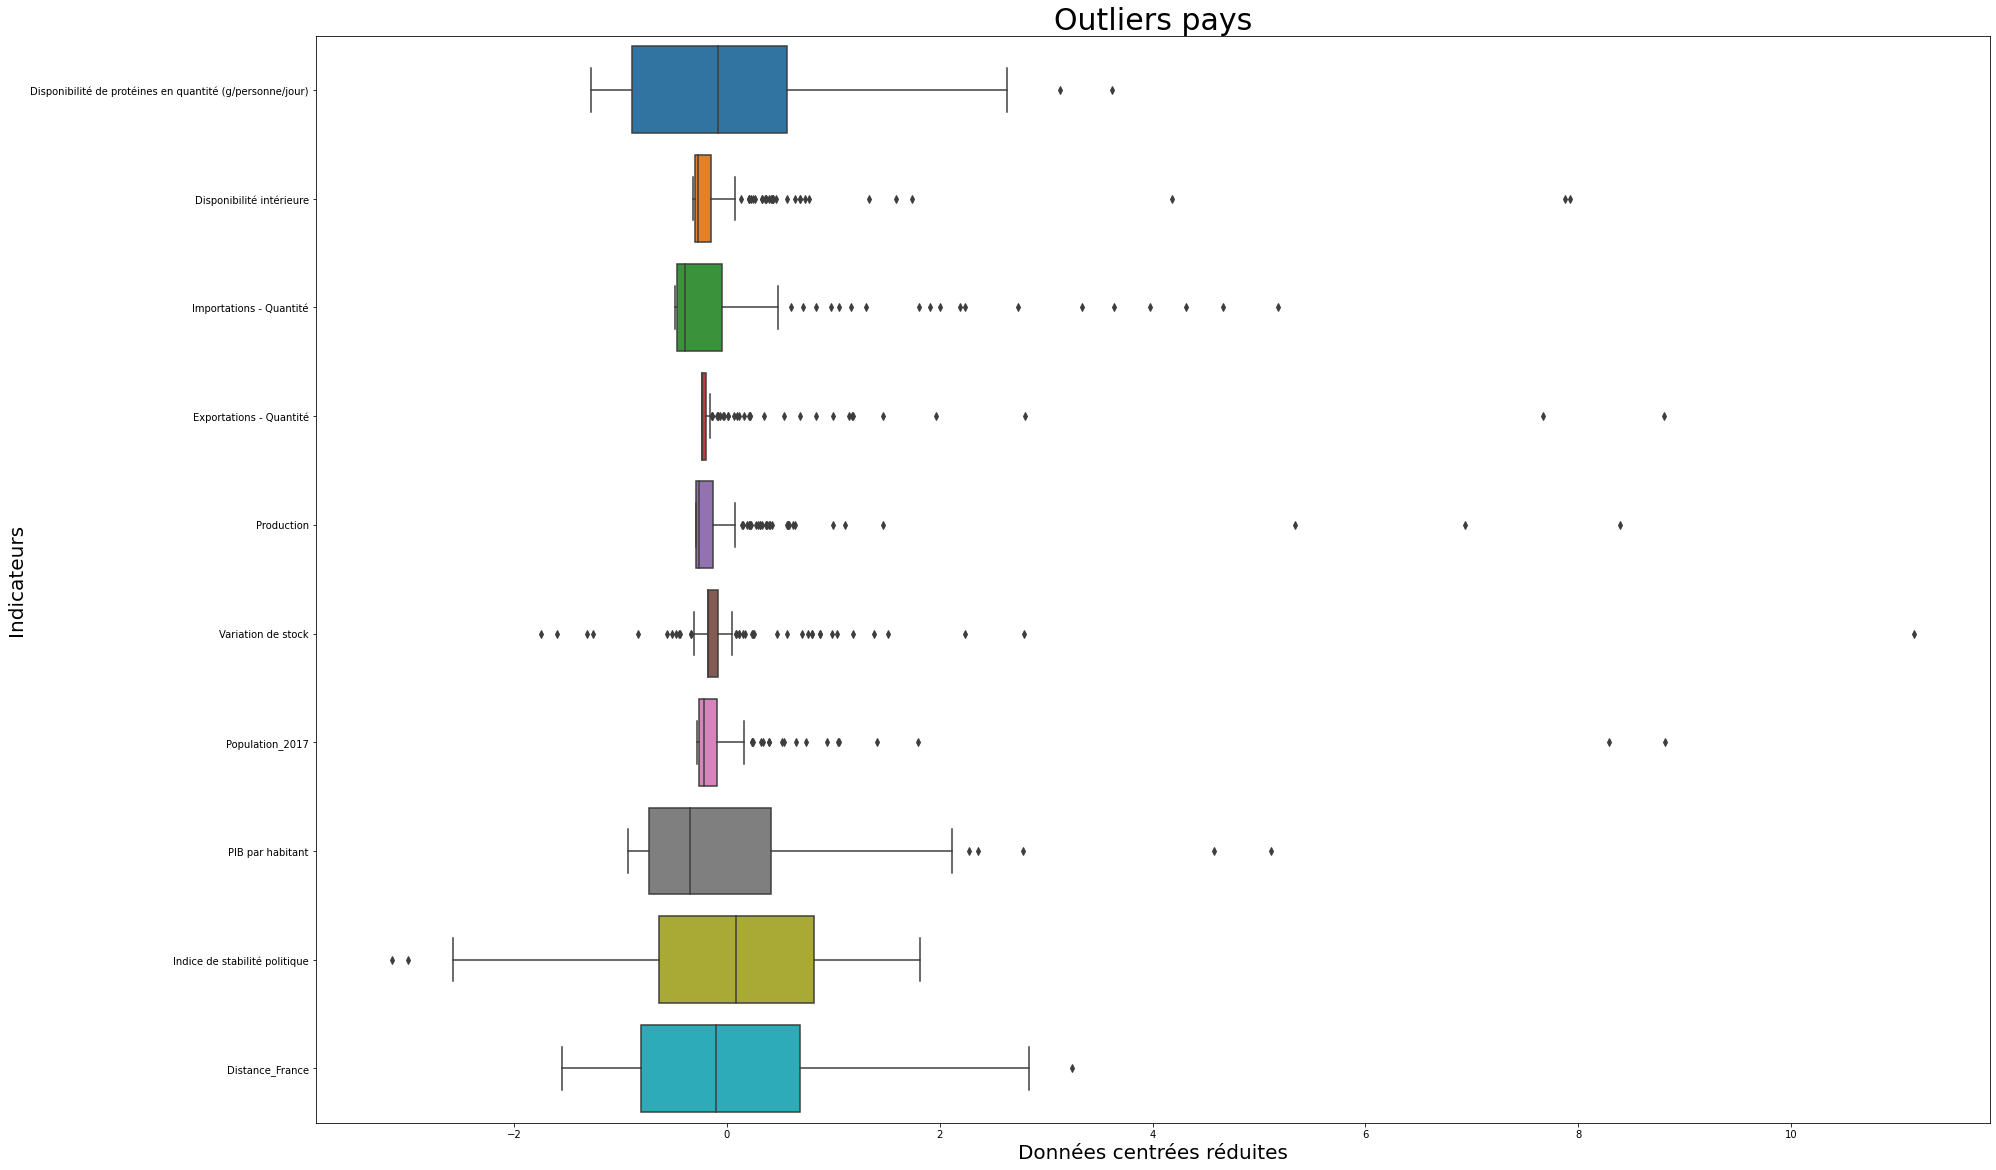

In [45]:
plt.figure(figsize=(30,20))

p = sns.boxplot(data = donnees_centrees_reduites, orient = 'h')
p.set_xlabel('Données centrées réduites', fontsize = 20)
p.set_ylabel('Indicateurs', fontsize = 20)
p.set_title('Outliers pays', fontsize = 30);

## Détection des Outliers avec le calcul de l'écart interquartile

In [46]:
# On crée une fonction pour calculer l'écart interquartile

def IQR_bounds(dataframe, column_name, multiple):
    """Extract the upper and lower bound for outlier detection using IQR
    
    Input:
        dataframe: Dataframe you want to extract the upper and lower bound from
        column_name: column name you want to extract upper and lower bound for
        multiple: The multiple to use to extract this
        
    Output:
        lower_bound = lower bound for column
        upper_bound = upper bound for column"""
    
    # Extraction de Q1 et Q3 
    lower_quantile = dataframe[column_name].quantile(0.25)
    upper_quantile = dataframe[column_name].quantile(0.75)
   
    # Calcul écart Interquartile
    IQR = upper_quantile - lower_quantile
    
    #Extraction lower and upper bound
    lower_bound = lower_quantile - multiple * IQR
    upper_bound = upper_quantile + multiple * IQR
    
    #Retourne les valeurs
    return lower_bound, upper_bound

#set the columns we want
columns = donnees_centrees_reduites.columns

#create a dictionary to store the bounds
column_bounds = {}

#iteratre over each column to extract bounds
for column in columns:
    #extract normal and extreme bounds
    lower_bound, upper_bound =  IQR_bounds(donnees_centrees_reduites, column, 1.5)
    
    #send them to the dictionary
    column_bounds[column] = [lower_bound, upper_bound]

    #create the normal dataframe

df_outlier_lower_bound = donnees_centrees_reduites[(donnees_centrees_reduites < lower_bound).any(axis=1)]

df_outlier_upper_bound = donnees_centrees_reduites[(donnees_centrees_reduites > upper_bound).any(axis=1)]

print(df_outlier_lower_bound.shape)
print(df_outlier_upper_bound.shape)


(1, 10)
(15, 10)


In [47]:
# On affiche les Outliers 
df_outlier_upper_bound.sort_values(['Disponibilité de protéines en quantité (g/personne/jour)'],ascending = [False])

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,Population_2017,PIB par habitant,Indice de stabilité politique,Distance_France
Zone,,,,,,,,,,
Israël,3.616869,-0.031824,-0.485988,-0.226324,-0.042781,-0.308519,-0.230047,0.917743,-0.908179,-0.683610
Saint-Vincent-et-les Grenadines,3.130191,-0.315065,-0.438338,-0.232746,-0.292135,-0.163466,-0.282145,-0.336056,1.037624,0.260525
Chine - RAS de Hong-Kong,2.631215,-0.192387,4.316041,1.186442,-0.282620,-0.334893,-0.236052,1.916230,0.972035,0.946803
États-Unis d'Amérique,2.221844,7.919652,0.165224,7.670182,8.395216,0.878279,1.799301,1.919729,0.381735,-0.033330
Brésil,1.475137,4.183405,-0.470105,8.806816,5.337557,-0.176653,1.048315,-0.267509,-0.449057,0.877538
Arabie saoudite,1.455811,0.328540,3.336576,-0.211341,-0.047934,-1.600811,-0.070837,1.312153,-0.634892,-0.334652
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,1.139558,0.688905,3.638357,0.535713,0.426988,-0.176653,0.144537,1.267155,0.491050,-1.456739
Nouvelle-Zélande,0.832091,-0.242902,-0.480694,-0.183513,-0.203731,0.245320,-0.252732,1.066989,1.813758,3.245050
Chine - RAS de Macao,0.811007,-0.310103,-0.364217,-0.232746,-0.290945,-0.071160,-0.278861,5.111145,1.627923,0.938725


<br> 

<div class="alert alert-warning"><b> CONSTAT</b> 

Après la sélection des indicateurs et la création de notre DF final, nous avons réalisé un boxplot et calculer l'écart interquartile pour détecter les outliers. 
    
Pour chaque indicateur, nous remarquons qu'il y a plusieurs outliers mais certains sont plus en marge que d'autres.
    
> Disponibilité intérieure : 3 outliers : <b>Etats-Unis, Chine, Brésil</b>

> Exportations : 2 outliers : <b>Brésil, Etats-Unis</b>

> Production : 3 outliers : <b>Etats-Unis, Chine, Brésil</b>

> Variation de stock : 1 outlier : <b>Japon</b>

> Population : 2 outliers : <b>Chine et  Inde</b>

> Distance_France : 1 outlier : <b>Nouvelle-Zelande</b>

    
<b>CONSEQUENCE</b> 
    
Nous changeons la variable 'Population_2017' et nous calculons l'évolution moyenne de la population entre 2000 et 2017 avant de réaliser l'ACP.

## Calcul de l'évolution annuelle moyenne de la population entre 2000 et 2017

>  Nous calculons l'évolution moyenne par an de la population de chaque pays et nous gardons uniquement cet indicateur démographique pour la suite de l'analyse.

In [48]:
population['Evol_moy_pop_par_an_%'] = round(((population['Population_2017'] / population['Population_2000'])**(1/18)-1)*100,2)
population.head()

,Zone,Population_2000,Population_2001,Population_2002,Population_2003,Population_2004,Population_2005,Population_2006,Population_2007,Population_2008,...,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,Evol_moy_pop_par_an_%
0,Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,...,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921,3.15
1,Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,...,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518,1.33
2,Albanie,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,3002.678,...,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740,-0.45
3,Algérie,31042.235,31451.514,31855.109,32264.157,32692.163,33149.724,33641.002,34166.972,34730.608,...,35977.455,36661.445,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408,1.61
4,Allemagne,81400.882,81453.885,81535.122,81614.380,81646.474,81602.741,81472.226,81277.830,81065.752,...,80827.002,80855.632,80972.628,81174.367,81450.378,81787.411,82193.768,82658.409,83124.418,0.09


In [49]:
population_final = population[['Zone','Evol_moy_pop_par_an_%' ]]

> Jointure DF_FINAL et POPULATION_FINAL

In [50]:
df_final_3 = pd.merge(df_final_2, population_final, how = 'left', on = 'Zone')

In [51]:
df_final_3.drop(columns = ('Population_2017'), inplace = True)
df_final_3.head()

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,PIB par habitant,Indice de stabilité politique,Distance_France,Evol_moy_pop_par_an_%
0,Afghanistan,0.54,57.0,29.0,0.0,28.0,0.0,2058.4,-2.80,5594.223377,3.15
1,Afrique du Sud,14.11,2118.0,514.0,63.0,1667.0,0.0,13860.3,-0.28,9306.638530,1.33
2,Albanie,6.26,47.0,38.0,0.0,13.0,4.0,12771.0,0.38,1603.944535,-0.45
3,Algérie,1.97,277.0,2.0,0.0,275.0,0.0,11737.4,-0.92,1345.460397,1.61
4,Allemagne,7.96,1739.0,842.0,646.0,1514.0,-29.0,53071.5,0.59,880.634838,0.09


> On reprend l'ACP avec le nouveau DF (modification de l'indicateur Population)

In [52]:
df_final_3.isnull().sum()

Zone                                                        0
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    0
Importations - Quantité                                     0
Exportations - Quantité                                     0
Production                                                  0
Variation de stock                                          0
PIB par habitant                                            0
Indice de stabilité politique                               0
Distance_France                                             0
Evol_moy_pop_par_an_%                                       1
dtype: int64

In [53]:
df_final_3[df_final_3['Evol_moy_pop_par_an_%'].isnull()]

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,PIB par habitant,Indice de stabilité politique,Distance_France,Evol_moy_pop_par_an_%
134,Soudan,0.54,69.0,2.0,0.0,67.0,0.0,4598.9,-1.98,4601.584868,NaN


> Il y a 1 pays pour lesquels nous n'avons pas l'évolution annuelle moyenne de la population car nous n'avons pas toutes les données,de 2000 à 2017, nécessaires au calcul. 

In [54]:
df_final_3.fillna(0, inplace = True)
X = df_final_3.copy()
X.set_index('Zone', inplace = True)

In [55]:
names = X.index
features = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, index=X.index,columns=X.columns).head()

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,PIB par habitant,Indice de stabilité politique,Distance_France,Evol_moy_pop_par_an_%
Zone,,,,,,,,,,
Afghanistan,-1.184896,-0.292965,-0.332450,-0.232746,-0.281035,-0.176653,-0.868223,-2.996090,-0.100129,1.552760
Afrique du Sud,1.199295,0.636587,2.235338,-0.097891,0.368713,-0.176653,-0.299520,-0.241359,0.859150,0.002597
Albanie,-0.179917,-0.297475,-0.284800,-0.232746,-0.286981,-0.123906,-0.352010,0.480118,-1.131207,-1.513497
Algérie,-0.933652,-0.193740,-0.475399,-0.232746,-0.183116,-0.176653,-0.401817,-0.940973,-1.197999,0.241083
Allemagne,0.118766,0.465650,3.971905,1.150052,0.308059,-0.559066,1.589968,0.709679,-1.318109,-1.053558


## Variance et scree plot

> Intéressons nous maintenant à la variance captée pour déterminer le nombre de composantes sur lesquelles travailler.


In [56]:
# On instancie notre ACP
pca = PCA()

# On l'entraine sur les données scalées
pca.fit(X_scaled)

PCA()

In [57]:
# Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :

pca.explained_variance_ratio_

array([3.02921397e-01, 2.09122562e-01, 1.18925242e-01, 1.11085225e-01,
       9.21846070e-02, 6.11886979e-02, 4.74064278e-02, 3.23789398e-02,
       2.47868995e-02, 3.09806567e-09])

> Ici la 1ère composante *capte* 30% de la variance de nos données initiales, la 2ème 21% etc.

In [58]:
# On enregistre cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([30.29, 20.91, 11.89, 11.11,  9.22,  6.12,  4.74,  3.24,  2.48,
        0.  ])

In [59]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 30.,  51.,  63.,  74.,  83.,  90.,  94.,  98., 100., 100.])

In [60]:
# On définit une variable avec la liste des composantes (10)

x_list = range(10)
list(x_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

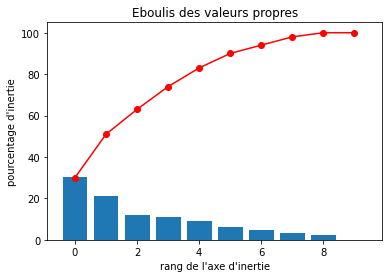

In [61]:
# On l'affiche de façon graphique 

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

> On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 80% de la variance est comprise dans les 4 premières composantes, et près de 90% dans les 5 premières.

<br> 

<div class="alert alert-danger"><b> Nous choisissons de travailler sur 6 premières composantes  </b> 

In [62]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

## Composantes 

> C'est par un calcul que l'on obtient les composantes.

La formule de ce calcul nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :

In [63]:
pcs = pca.components_
pcs

array([[ 0.30993502,  0.46798131,  0.2542755 ,  0.44804543,  0.47947534,
         0.14025455,  0.29184122,  0.19551597, -0.02086296, -0.21478373],
       [-0.33438872,  0.3513075 , -0.11961529,  0.24317204,  0.35778927,
        -0.16604334, -0.42604746, -0.50241698,  0.13389835,  0.28961213],
       [-0.34194053, -0.01744446,  0.37836518, -0.00296941, -0.03673545,
         0.24924638,  0.14799127, -0.32625023, -0.73939119, -0.0330172 ],
       [-0.06325677, -0.00506802,  0.45262369, -0.15025752, -0.04515308,
         0.69862807, -0.20170113, -0.03929726,  0.47095862,  0.11990728],
       [ 0.17020235, -0.01015966,  0.40728414, -0.0353833 , -0.05590249,
        -0.33100832,  0.35185708, -0.01363297,  0.06421792,  0.75032712],
       [ 0.28017145,  0.03025406,  0.54358444, -0.21180341, -0.06701202,
        -0.4554948 , -0.30431481, -0.27117282,  0.07704037, -0.44294513]])

In [64]:
pcs = pca.components_

# Version pandas
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9
0,0.309935,0.467981,0.254276,0.448045,0.479475,0.140255,0.291841,0.195516,-0.020863,-0.214784
1,-0.334389,0.351307,-0.119615,0.243172,0.357789,-0.166043,-0.426047,-0.502417,0.133898,0.289612
2,-0.341941,-0.017444,0.378365,-0.002969,-0.036735,0.249246,0.147991,-0.326250,-0.739391,-0.033017
3,-0.063257,-0.005068,0.452624,-0.150258,-0.045153,0.698628,-0.201701,-0.039297,0.470959,0.119907
4,0.170202,-0.010160,0.407284,-0.035383,-0.055902,-0.331008,0.351857,-0.013633,0.064218,0.750327
5,0.280171,0.030254,0.543584,-0.211803,-0.067012,-0.455495,-0.304315,-0.271173,0.077040,-0.442945


In [65]:
x_list = range(1, n_components+1)
list(x_list)

pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,PIB par habitant,Indice de stabilité politique,Distance_France,Evol_moy_pop_par_an_%
F1,0.31,0.47,0.25,0.45,0.48,0.14,0.29,0.20,-0.02,-0.21
F2,-0.33,0.35,-0.12,0.24,0.36,-0.17,-0.43,-0.50,0.13,0.29
F3,-0.34,-0.02,0.38,-0.00,-0.04,0.25,0.15,-0.33,-0.74,-0.03
F4,-0.06,-0.01,0.45,-0.15,-0.05,0.70,-0.20,-0.04,0.47,0.12
F5,0.17,-0.01,0.41,-0.04,-0.06,-0.33,0.35,-0.01,0.06,0.75
F6,0.28,0.03,0.54,-0.21,-0.07,-0.46,-0.30,-0.27,0.08,-0.44


<br> 

<div class="alert alert-danger"><b> RAPPEL </b> 


Comment calcule t-on la première composante F1 ?


F1 = (0.41 * Disponibilité alimentaire (Kcal/personne/jour)) + (0.41 * Disponibilité de protéines en quantité (g/personne/jour)) + (0.35 * Disponibilité intérieure) + ... + (0.27 * Indice de stabilité politique)

<b> et F2 ? </b> 

F2 = (-0.26 * Disponibilité alimentaire (Kcal/personne/jour)) + (-0.29 * Disponibilité de protéines en quantité (g/personne/jour)) + (0.47 * Disponibilité intérieure) + ... + (-0.41 * Indice de stabilité politique)

## Cercle des corrélations

In [66]:
# On définit nos axes x et y. 
# Nous allons utiliser les 2 premières composantes.
x, y = 0,1

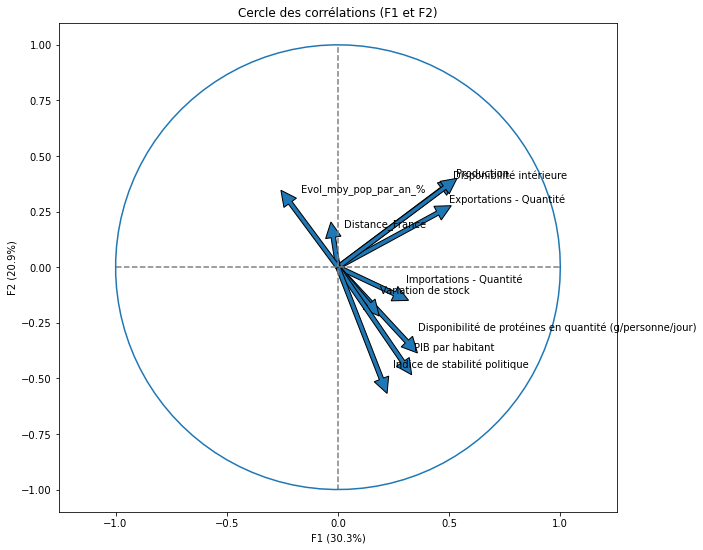

In [67]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

<br> 

<div class="alert alert-danger"><b> Les dimensions 1 et 2 expliquent 51.2 % de la variance totale . </b> 


> 1ère remarque : les indicateurs Production et Disponibilité intérieure sont très (trop) correlés, les flèches se confondent. 


> Les valeurs les plus corrélées à F1 sont : 
    
- Importations
- Exportations
- Disponibilité de protéines en quantité (g/personne/jour)
= L'importation et l'exportation jouent sur la Disponibilité de protéines en quantité (g/personne/jour)
    

> Les valeurs les plus corrélées à F2 sont : 
    
- Distance entre les pays et la France
- Evolution annuelle moyenne de la population
- Indice de Stabilité politique et PIB par habitant (qui ont une corrélation négative à F2)


## Projection

In [68]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-2.0232686 ,  2.51672691,  1.12322453,  0.28209979,  0.64232475,
         0.00821146],
       [ 1.1930748 ,  0.05733887, -0.23361924,  1.28215688,  1.10442204,
         1.86849001],
       [-0.18683812, -0.83001906,  0.61694489, -0.81675094, -1.41696663,
         0.47092006],
       [-1.04580668,  0.76158728,  1.23150383, -0.65258556, -0.29821386,
        -0.20546743],
       [ 2.70581296, -1.38409061,  2.3131717 ,  0.11492189,  1.43492555,
         1.88567555]])

In [69]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
  
    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels is not None: 
        # j'ai copié collé la fonction sans la lire
        for i,(x,y) in enumerate(X_projected[:,[x,y]]):
            plt.text(x, y, labels[i], fontsize='14', ha='center',va='center') 
            
    

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()


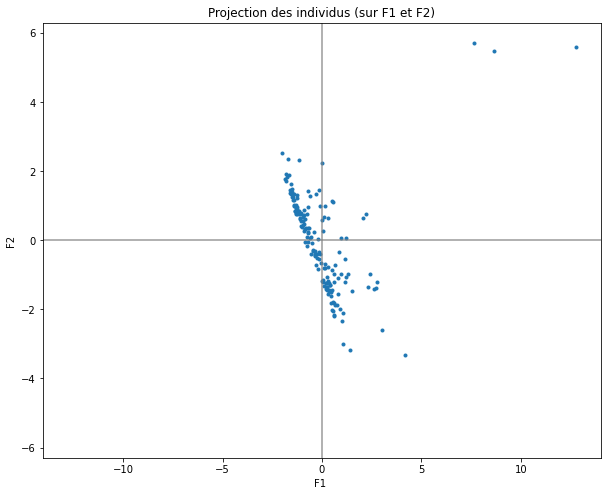

In [70]:
# Version simple avec F1 et F2

x_y = [0,1]
display_factorial_planes(X_proj, x_y)

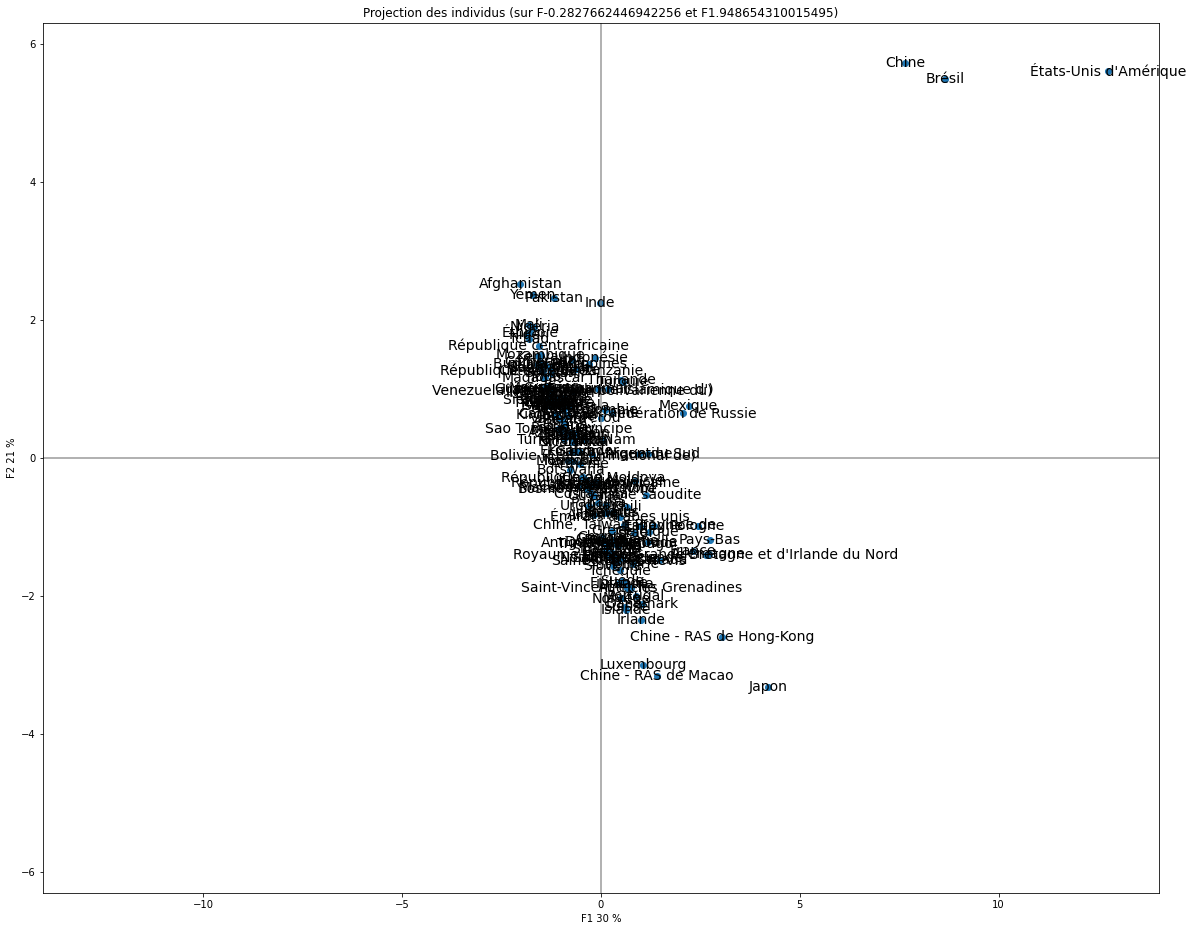

In [71]:
# Version élaborée avec F1 et F2
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca,labels = names ,figsize=(20,16), marker="o")

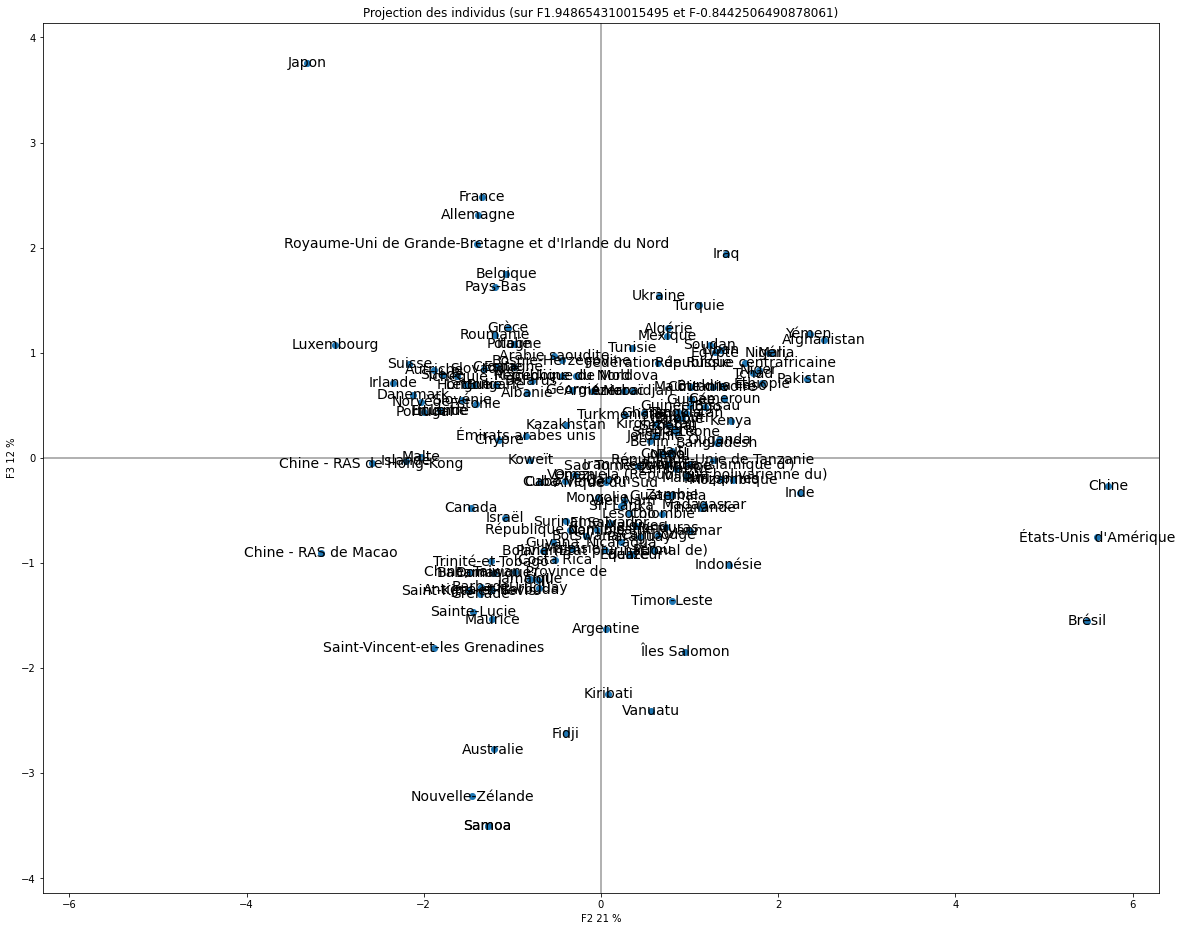

In [72]:
#Version élaborée F2 et F3

x_y = 1,2
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

> Sur la projection, nous pouvons voir clairement les outliers précedemment détectés : Chine, Etats-Unis et Brésil.

<br> 

<div class="alert alert-warning"><b>RAPPEL : </b> 

   - Nous avons préparé, nettoyé et effectué une analyse exploratoire de nos données.
    
   - Nous avons choisis nos indicateurs.
    
   - Nous avons réalisé une première ACP avec cercle des corrélations et projection des individus.

   - Nous avons détecté des outliers.
    
   - Nous avons calculé l'évolution annuelle moyenne de la population.

<br> 

<div class="alert alert-danger"><b> REALISONS UNE DEUXIEME ACP SANS OUTLIERS </b> 

> Nous supprimons les Outliers

> Nous supprimons les indicateurs trop corrélés et non pertinents

# ACP N°2 SANS OUTLIERS

In [73]:
df_final_3.set_index('Zone', inplace = True)
df_final_3.head()

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Exportations - Quantité,Production,Variation de stock,PIB par habitant,Indice de stabilité politique,Distance_France,Evol_moy_pop_par_an_%
Zone,,,,,,,,,,
Afghanistan,0.54,57.0,29.0,0.0,28.0,0.0,2058.4,-2.80,5594.223377,3.15
Afrique du Sud,14.11,2118.0,514.0,63.0,1667.0,0.0,13860.3,-0.28,9306.638530,1.33
Albanie,6.26,47.0,38.0,0.0,13.0,4.0,12771.0,0.38,1603.944535,-0.45
Algérie,1.97,277.0,2.0,0.0,275.0,0.0,11737.4,-0.92,1345.460397,1.61
Allemagne,7.96,1739.0,842.0,646.0,1514.0,-29.0,53071.5,0.59,880.634838,0.09


In [74]:
# Suppression des Outliers Chine, Etats-Unis d'Amérique, Brésil et Japon
df_sans_outliers = df_final_3.drop(['Chine', 'États-Unis d\'Amérique', 'Brésil', 'Japon'])

# Suppression des colonnes Disponibilité intérieure, production et Variation de stock
df_sans_outliers.drop(columns =[ 'Disponibilité intérieure', 'Production', 'Variation de stock'], inplace = True)

In [75]:
df_sans_outliers.reset_index(inplace = True)
df_sans_outliers.to_csv(r'C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\PROJETS OCR\PROJET 9\DAN-P9-data\df_sans_outliers.csv', index=False)

In [76]:
df_sans_outliers.set_index('Zone', inplace = True)

In [77]:
X = df_sans_outliers.copy()
names = X.index
features = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
# On instancie notre ACP
pca = PCA()

# On l'entraine sur les données scalées
pca.fit(X_scaled)

pca.explained_variance_ratio_

array([0.36061811, 0.2001471 , 0.14789969, 0.11612483, 0.07816792,
       0.05961691, 0.03742543])

> Ici la 1ère composante *capte* 36% de la variance de nos données initiales, la 2ème 20% etc.

In [79]:
# On enregistre cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)

# Variance cumulée
scree_cum = scree.cumsum().round()
scree_cum

array([ 36.,  56.,  71.,  82.,  90.,  96., 100.])

In [80]:
# On définit une variable avec la liste des composantes (7)

x_list = range(7)
list(x_list)

[0, 1, 2, 3, 4, 5, 6]

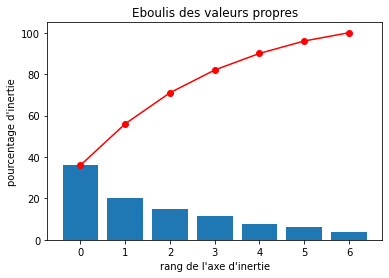

In [81]:
# On l'affiche de façon graphique 

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

> On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 80% de la variance est comprise dans les 4 premières composantes, et près de 90% dans les 5 premières.

<br> 

<div class="alert alert-danger"><b> Nous choisissons de travailler sur 6 premières composantes  </b> 

## Composantes 

In [82]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

In [83]:
pcs = pca.components_

# Version pandas

pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.433981,0.323228,0.359400,0.504892,0.428045,-0.173151,-0.331507
1,-0.344939,0.423956,0.452710,-0.002370,-0.458728,-0.519179,0.127855
2,0.227136,0.526522,0.152785,-0.034778,-0.058546,0.596247,0.536370
3,-0.016730,-0.082379,-0.387637,0.528625,0.136168,-0.357948,0.645414
4,-0.568285,-0.311853,0.526442,0.150068,0.432766,0.243879,0.182685
5,-0.533717,0.573373,-0.457287,-0.005352,0.336008,0.066953,-0.244673


In [84]:
x_list = range(1, n_components+1)
list(x_list)

pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Exportations - Quantité,PIB par habitant,Indice de stabilité politique,Distance_France,Evol_moy_pop_par_an_%
F1,0.43,0.32,0.36,0.50,0.43,-0.17,-0.33
F2,-0.34,0.42,0.45,-0.00,-0.46,-0.52,0.13
F3,0.23,0.53,0.15,-0.03,-0.06,0.60,0.54
F4,-0.02,-0.08,-0.39,0.53,0.14,-0.36,0.65
F5,-0.57,-0.31,0.53,0.15,0.43,0.24,0.18
F6,-0.53,0.57,-0.46,-0.01,0.34,0.07,-0.24


## Cercle des corrélations

In [85]:
# On définit nos axes x et y. 
# Nous allons utiliser les 2 premières composantes.
x, y = 0,1

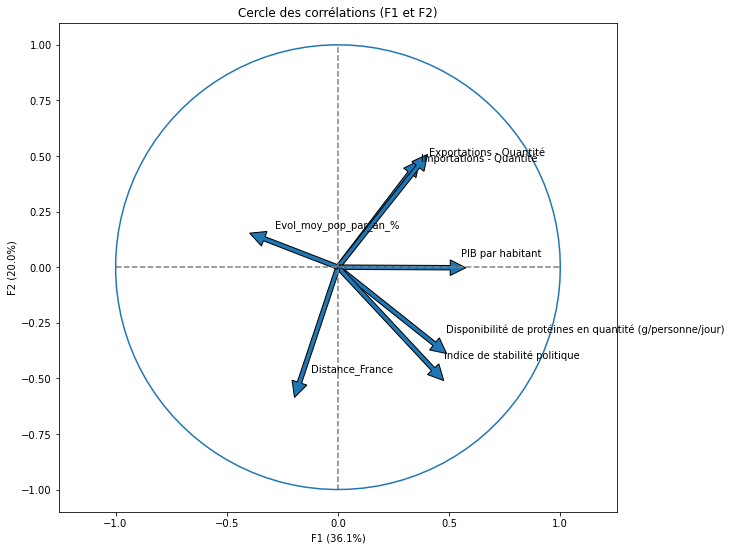

In [86]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

<br> 

<div class="alert alert-danger"><b> Les dimensions 1 et 2 expliquent 56.1% de la variance totale . </b> 
    
Rappelons nous qu'avec les outliers, les dimensions 1 et 2 expliquent  51.2% de la variance totale.


> Les valeurs les plus corrélées à F1 sont : 

- PIB par habitant
- Disponibilité de protéines en quantité 
- Evolution annuelle moyenne de la population (corrélation négative)
    
> Les valeurs les plus corrélées à F2 sont :

- Importations
- Exportations
- Distance entre la France et les autres pays (Corrélation négative)

## Projection 

In [87]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-2.92435461,  1.731328  ,  0.48981991,  0.32782766, -0.55383718,
        -0.78126786],
       [ 0.96075876,  0.29889415,  2.13508162, -0.739445  , -1.39947872,
         0.74738822],
       [ 0.46187033, -0.04003107, -1.7187912 , -0.54913777, -0.38183135,
         0.54145411],
       [-1.13288283,  1.03977649, -1.02170419,  0.41152963, -0.19986518,
        -0.07708865],
       [ 4.32821866,  3.47375187,  1.39841552, -0.88068904,  0.27280815,
         1.38917911]])

In [88]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
   

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels is not None: 
        for i,(x,y) in enumerate(X_projected[:,[x,y]]):
            plt.text(x, y, labels[i], fontsize='14', ha='center',va='center') 
            
    

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()

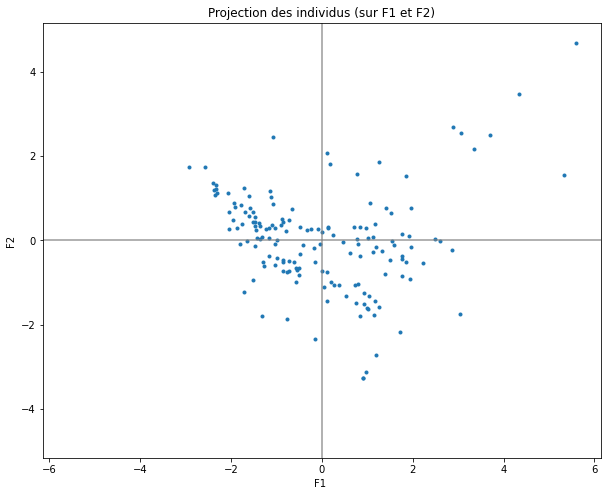

In [89]:
# Version simple avec F1 et F2

x_y = [0,1]
display_factorial_planes(X_proj, x_y)

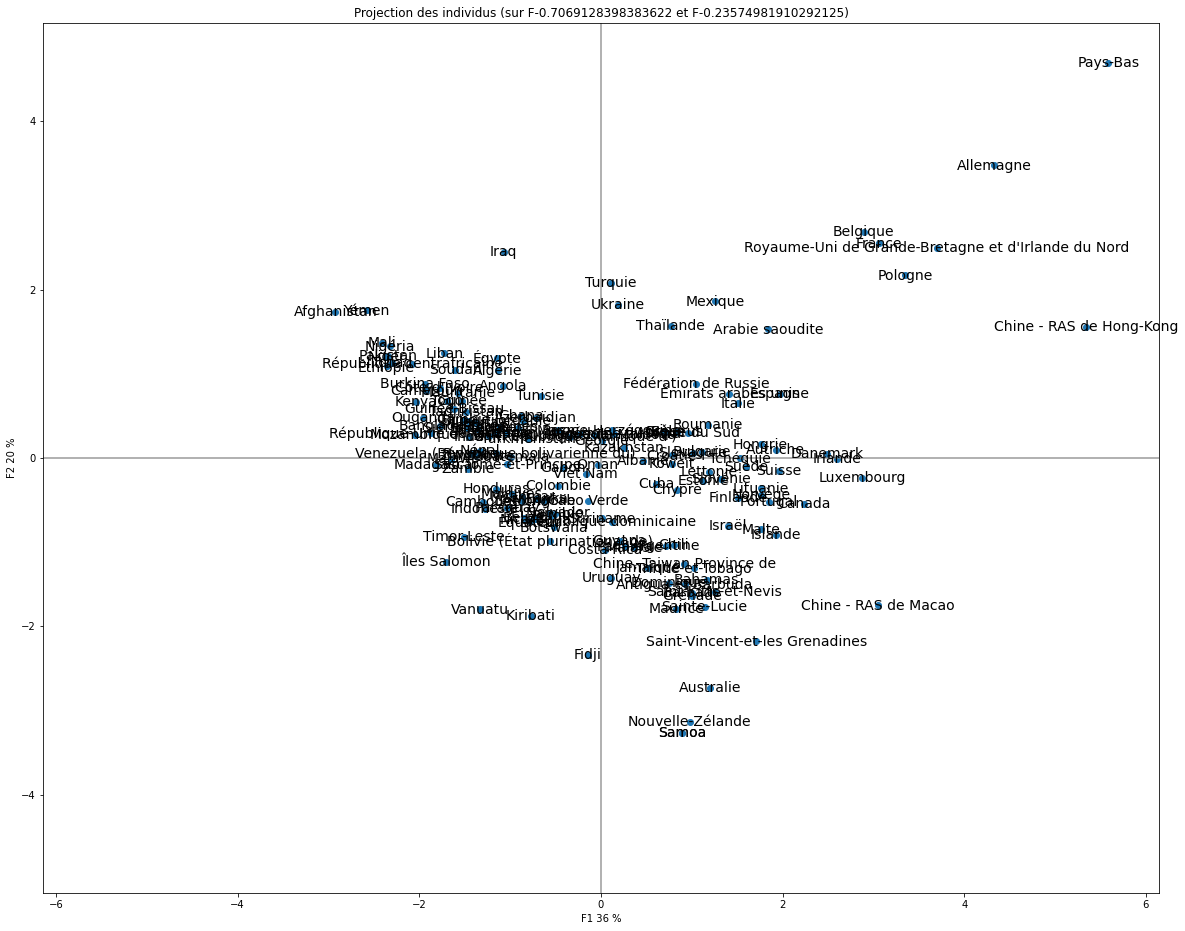

In [90]:
# Version élaborée avec F1 et F2
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca,labels = names ,figsize=(20,16), marker="o")

<br> 

<div class="alert alert-warning"><b>  <b>

    
    
Passons à la deuxième partie qui consiste en la détection de Clusters via 2 méthodes :
- l'ACH
- le K-Means